In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import pandas as pd

# import matplotlib as mpl
# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['pgf.rcfonts'] = False
# plt.rcParams['figure.edgecolor'] = 'k'
# plt.rcParams['figure.facecolor'] = 'w'
# plt.rcParams['savefig.dpi'] = 400
# plt.rcParams['savefig.bbox'] = 'tight'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = "serif"

### Naive Capacity Expansion

Illinois passed the Climate and Equitable Jobs Act in September of 2021. This bill pledges Illinois to build 17 GW of solar panels and an additional 6.3 GW of wind turbines (for a total of 12.6 GW) by 2030. The Illinois Clean Jobs Coalition asserts this capacity is enough to make Illinois' electric grid carbon neutral in 2030. 

Let's check. 


Assumptions: 
1. Illinois' existing nuclear fleet will continue operating in 2030
2. All fossil fuel plants will be replaced by wind or solar energy by 2030. 
3. Illinois electricity demand does not increase.
4. Illinois' total energy exports are allowed to go to zero.

With this information, we can determine the optimal mixture of wind and solar capacity using an optimization strategy called linear programming. The problem is to minimize: 

$C_{total} = C_{solar}x + C_{wind}y$

Where $x$ and $y$ are the decision variables corresponding to the solar and wind capacity respectively. This objective function is subject to the constraint:

$CF_{s}x + CF_{w}y = CAP_{needed}$

In [2]:
17*0.2+0.35*6.3

5.605

In [3]:
# set up basic data

cf_s = 0.2
cf_w = 0.35
cf_n = 0.93

cost_s = 0.811
cost_w = 1.411

demand_2019 = 138 # TWh
nuc_gen_2019 = 98.7 # TWh
TWh_to_GW = 8.76
cap_needed = (demand_2019-nuc_gen_2019)/TWh_to_GW
print(f'Remaining Capacity: {cap_needed} GW')

# max
max_wind = cap_needed/cf_w
max_solar = cap_needed/cf_s
print(f'Max solar: {max_solar}, Max wind: {max_wind}')

Remaining Capacity: 4.486301369863013 GW
Max solar: 22.431506849315063, Max wind: 12.818003913894325


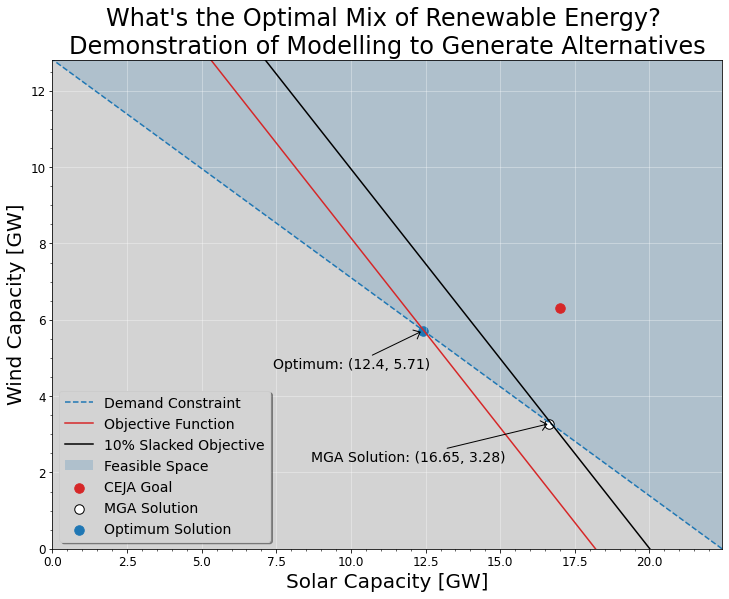

In [4]:
fig, ax = plt.subplots(figsize=(12,9), facecolor='w', edgecolor='k')
px1 = np.array([max_solar,0])
px2 = np.array([0, max_wind])
cx1 = np.array([cost_s*max_solar, 0])
cx2 = np.array([0, cost_w*max_wind])
slack = 0.1
slacked_x1 = cx1*(1+slack)
slacked_x2 = cx2*(1+slack)
opt1 = (12.4,5.71)
opt2 = (16.65, 3.28)
ax.plot(px1, px2, label='Demand Constraint', linestyle='--')
ax.plot(cx1, cx2, label='Objective Function', color='tab:red')
ax.plot(slacked_x1, slacked_x2, label='10% Slacked Objective', color='k')
ax.set_ylim(0, max_wind)
ax.set_xlim(0, max_solar)
ax.fill_between(px1, px2, max_wind, alpha=0.2, label='Feasible Space')
ax.scatter(x=17, y=6.3, c='tab:red', label='CEJA Goal', s=90)
ax.scatter(x=opt2[0], y=opt2[1], c='w', label='MGA Solution', edgecolor='k', linewidth=1, s=90)
ax.scatter(x=opt1[0],y=opt1[1], label='Optimum Solution', color='tab:blue', marker='o', s=90)
ax.minorticks_on()
# ax.grid(which='minor', linestyle='--', color='gray', alpha=0.4)
ax.grid(which='major', linestyle='-', color='w', alpha=0.4)
ax.legend(loc='lower left', fancybox=True, shadow=True, facecolor='lightgray',fontsize=14)
ax.set_xlabel('Solar Capacity [GW]',fontsize=20)
ax.set_ylabel('Wind Capacity [GW]',fontsize=20)
ax.set_title('What\'s the Optimal Mix of Renewable Energy? \nDemonstration of Modelling to Generate Alternatives',
             fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=12)
# ax.arrow(x=cx1[0]-1,y=cx1[1]+1, dx=slacked_x1[0]*0.97-cx1[0],dy=slacked_x1[1]-cx1[1], width=0.1, color='k')

ax.annotate(f'Optimum: {opt1}', opt1, xycoords='data', xytext=(opt1[0]-5, opt1[1]-1), arrowprops=dict(facecolor='k',
                                                                                                      arrowstyle='->, head_width=0.35'),
            fontsize=14)
ax.annotate(f'MGA Solution: {opt2}', opt2, xycoords='data', xytext=(opt2[0]-8, opt2[1]-1), arrowprops=dict(facecolor='k',
                                                                                                      arrowstyle='->, head_width=0.35'),
            fontsize=14)
ax.set_facecolor('lightgray')

# plt.savefig('../../thesis/figures/naive_mga.pgf')

## What about parametric uncertainties?

In [5]:
def get_line(x_int, y_int, n=1000):
    """
    returns x,y data for a line between 
    two specified points.
    """
    
    m = (y_int[1]-y_int[0])/(x_int[1]-x_int[0])
    y = lambda t: m*t + y_int[1]
    
    x = np.linspace(0, x_int[0], n)
    data = y(x)
    
    return x, data

In [6]:
unc = 0.1
cf_s_low = cf_s*(1-unc)
cf_s_high = cf_s*(1+unc)
cf_w_low = cf_w*(1-unc)
cf_w_high = cf_w*(1+unc)

cost_s_low = cost_s*(1-unc)
cost_s_high = cost_s*(1+unc)
cost_w_low = cost_w*(1-unc)
cost_w_high = cost_w*(1+unc)

cap_needed_low = cap_needed*(1-unc)
cap_needed_high = cap_needed*(1+unc)
print(f'Remaining Capacity: {cap_needed_low} to {cap_needed_high} GW')

# max
max_wind_low = cap_needed_low/cf_w_high
max_wind_high = cap_needed_high/cf_w_low
max_solar_low = cap_needed_low/cf_s_high
max_solar_high = cap_needed_high/cf_s_low

Remaining Capacity: 4.037671232876712 to 4.934931506849315 GW


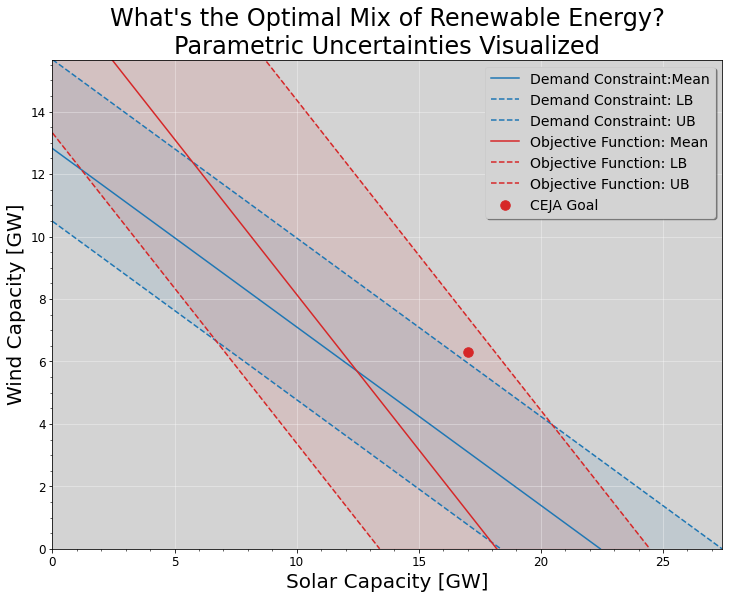

In [7]:
fig, ax = plt.subplots(figsize=(12,9), facecolor='w', edgecolor='k')
# central values
px1 = np.array([max_solar,0])
px2 = np.array([0, max_wind])
px1_low = np.array([max_solar_low,0])
px2_low = np.array([0, max_wind_low])
px1_high = np.array([max_solar_high,0])
px2_high = np.array([0, max_wind_high])
x, dd = get_line(px1, px2)
x1,dd_low = get_line(px1_low, px2_low)
x2,dd_high = get_line(px1_high, px2_high)

# create common x
xfill = np.sort(np.concatenate([x1,x2]))
y1fill = np.interp(xfill, x1, dd_low)
y2fill = np.interp(xfill, x2, dd_high)

# low estimates

cx1 = np.array([cost_s*max_solar, 0])
cx2 = np.array([0, cost_w*max_wind])
cx1_low = np.array([cost_s_low*max_solar_low, 0])
cx2_low = np.array([0, cost_w_low*max_wind_low])
cx1_high = np.array([cost_s_high*max_solar_high, 0])
cx2_high = np.array([0, cost_w_high*max_wind_high])
x3, od = get_line(cx1, cx2)
x4,od_low = get_line(cx1_low, cx2_low)
x5,od_high = get_line(cx1_high, cx2_high)

# create common x
x2fill = np.sort(np.concatenate([x4,x5]))
y3fill = np.interp(x2fill, x4, od_low)
y4fill = np.interp(x2fill, x5, od_high)

# x3fill = np.sort(np.concatenate([]))


# demand constraints
ax.plot(x, dd, label='Demand Constraint:Mean', linestyle='-', color='tab:blue')
ax.plot(x1, dd_low, label='Demand Constraint: LB', linestyle='--', color='tab:blue')
ax.plot(x2, dd_high, label='Demand Constraint: UB', linestyle='--', color='tab:blue')
ax.plot(x3, od, label='Objective Function: Mean', linestyle='-', color='tab:red')
ax.plot(x4, od_low, label='Objective Function: LB', linestyle='--', color='tab:red')
ax.plot(x5, od_high, label='Objective Function: UB', linestyle='--', color='tab:red')
ax.scatter(x=17, y=6.3, c='tab:red', label='CEJA Goal', s=90)


ax.fill_between(xfill,y1fill,y2fill,alpha=0.1)
ax.fill_between(x2fill,y3fill,y4fill,alpha=0.1, color='tab:red')
# ax.fill_between(x1,dd_low,alpha=1, color='w')
ax.legend(fancybox=True, shadow=True, facecolor='lightgray',fontsize=14)
ax.set_facecolor('lightgray')
ax.set_ylim(0, max_wind_high)
ax.set_xlim(0, max_solar_high)
ax.minorticks_on()
# ax.grid(which='minor', linestyle='--', color='gray', alpha=0.4)
ax.grid(which='major', linestyle='-', color='w', alpha=0.4)
ax.set_xlabel('Solar Capacity [GW]', fontsize=20)
ax.set_ylabel('Wind Capacity [GW]', fontsize=20)
ax.set_title('What\'s the Optimal Mix of Renewable Energy?\nParametric Uncertainties Visualized',fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=12)

# plt.savefig('../../thesis/figures/naive_parametric.pgf')

In [8]:
data_dict = {'':['Demand',
                 'Solar',
                 'Wind',
                 ],
             'Cost in 2030 [M$/GW]':['-',
                                     811,
                                     1411],
             'CF':['-',
                   0.2,
                   0.35], 
             'IL Clean Jobs Estimate [GW]':[39.3/8.76, 17, 6.3],
             'Optimal Solution [GW]':['-', 12.4, 5.71],
             'MGA Solution [GW]':['-', 16.65, 3.28],
             'Source':['','',''],
             }

data_df = pd.DataFrame(data_dict)
data_df

,,Cost in 2030 [M$/GW],CF,IL Clean Jobs Estimate [GW],Optimal Solution [GW],MGA Solution [GW],Source
0,Demand,-,-,4.486301,-,-,
1,Solar,811,0.2,17.000000,12.4,16.65,
2,Wind,1411,0.35,6.300000,5.71,3.28,


data_df.to_latex('../../thesis/methods/naive_ceja.tex', index=False)

#### Calculate Percentage Penetration

In [11]:
(cf_s*17*8760+cf_w*6.3*8760)/(demand_2019*1e3)

0.35579565217391307